In [ ]:
# %matplotlib widget

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from VesicleShapes_extension import *
# from VesicleShapes_extension import least_squares
# from VesicleShapes_extension import PlotShapes

# calculating the analytical shapes

## protocol for computation
    
- choose  omega,m,u0,delta_p,sigma   
- initial arc length
- initial values   
- integrate from initial arc length to 1-initial arc length   
- final values
- calculate residuals

In [2]:
def shapes_analyt():
    ###### my initial parameters: nu,omega,u0,u1,delta_p,sigma,m ######
    
    # RBC zero spontaneous curvature, volume reduced to 0.7.
    sequence = np.array([[0.7,4.2,1.85,1.85,-17.8,-6.4,0]])
    
    # Spherical shape, zero spontaneous curvature, no reduced volume
    sequence = np.array([[1.0,3.35,1.4,1.4,-11.4,-5.5,0]])
    
    para_dict=sequence
    
    
    gamma_list=[]
    nu_list=[]
    
    for index in range(len(para_dict)):
        m=para_dict[index,6]
        nu=para_dict[index,0]
        parameters_init=[para_dict[index,1],para_dict[index,2],
                          para_dict[index,3],para_dict[index,4],
                          para_dict[index,5]]
            
        shape_parameters=[m,nu]
        # shoting algorithm and solver
        result = least_squares(Residuales,parameters_init,args=([shape_parameters]),method='lm')
        points_2d = PlotShapes(result,shape_parameters,gamma_list,nu_list)
        return points_2d

In [4]:
points_2d = shapes_analyt()

reduced volume: 1.0
reduced preferred curvature: 0.0



In [5]:
def centering(points_2d):
    points_2d = points_2d - [0,points_2d.max()/2.0]
    return points_2d
    
def distance(points_2d,plot=False):
    # Calculate the differences between successive points
    differences = np.diff(points_2d, axis=0)
    
    # Calculate the distances using the Euclidean distance formula
    distances = np.linalg.norm(differences, axis=1)
    mean = np.mean(distances)
    print("Mean Distance: ",mean)

    if plot:
        plt.hist(distances,bins=20)
        plt.show()
    return mean

def scale(points_2d,scale):
    points_2d = points_2d * scale
    return points_2d

def shift(points_3d):
    points_3d = points_3d + np.abs(np.min(points_3d,axis=(0)))
    return points_3d


def add_symmetry(points_2d):
    symmx = points_2d[:,0] 
    symmy = points_2d[:,1] * -1
    symm = np.column_stack((symmx,symmy))
    print(symm.shape)
    a = np.vstack((points_2d,symm))
    return a


def reduce_points(points_2d,strain):
    reduced_points = points_2d[::strain]
    return reduced_points


def calculate_diameter(points):
    # Function to calculate the Euclidean distance between two points

    # Initialize the maximum distance to a small negative value
    max_distance = -np.inf
    
    # Iterate through all pairs of points
    for point1, point2 in itertools.combinations(points, 2):
        distance = np.linalg.norm(point1 - point2)
        if distance > max_distance:
            max_distance = distance
    print(f"The maximum distance between two points is: {max_distance}")
    return max_distance

def rotate(points_2d,angle_degrees):
    angle_radians = np.radians(angle_degrees)

    # Create the 3x3 rotation matrix for X-axis rotation
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)


    # # around x axis
    rotation_matrix = np.array([[1, 0, 0],
                            [0, cos_theta, -sin_theta],
                            [0, sin_theta, cos_theta]])
    # # around y axis
    # rotation_matrix = np.array([[cos_theta, 0, sin_theta],
    #                         [0, 1, 0],
    #                         [-sin_theta, 0, cos_theta]])

    # around z axis
    # rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
    #                         [sin_theta, cos_theta, 0],
    #                         [0, 0, 1]])
    
    # Apply the rotation matrix to each point to obtain the 3D rotated points
    points_3d = np.column_stack((points_2d, np.zeros(points_2d.shape[0])))
    points_3d_rotated = np.dot(points_3d, rotation_matrix.T)

    return points_3d_rotated   


def plot(points_3d_rotated,ax):
    # Extract X, Y, and Z coordinates of the rotated points
    x = points_3d_rotated[:, 0]
    y = points_3d_rotated[:, 1]
    z = points_3d_rotated[:, 2]

    # Plot the points in 3D
    ax.scatter(x, y, z)

In [57]:
# # points_2d = np.load("array.npy")
# points_2d = centering(points_2d)
# mean_dist = distance(points_2d)
# factor = 1.12 / mean_dist
# print("Scaling factor is: ",factor)
# calculate_diameter(points_2d)
# points_2d = scale(points_2d,factor)
# distance(points_2d)
# diameter = calculate_diameter(points_2d)
# points_2d = add_symmetry(points_2d)

# reducing_factor = 25
# points_2d_reduced = reduce_points(points_2d,reducing_factor)
# print(f"Reducing atoms from {points_2d.shape[0]} to {points_2d_reduced.shape[0]}")

2880
(2880, 3)


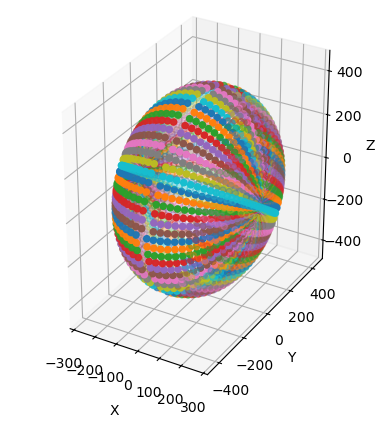

In [31]:
# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# angle_degrees = np.arange(0,180,5)
# # print(angle_degrees)

# surface_points = []

# N_points = points_2d_reduced.shape[0] * angle_degrees.shape[0]
# print(N_points)
# for i in angle_degrees:
#     points_3d_rotated = rotate(points_2d_reduced,i)
#     plot(points_3d_rotated,ax)
#     surface_points.append(points_3d_rotated)


# surface_points = np.asarray(surface_points)
# surface_points = surface_points.reshape((-1,3))
# print(surface_points.shape)

# ax.axes
# # Set axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# # Make the axes equal
# ax.set_aspect('equal', adjustable='box')
# # Show the plot
# plt.show()

# considering neighbours

In [ ]:
a = tree.query_radius([query_point],100.0,count_only=True)

In [ ]:
query_point = surface_points[0]
query_point

In [ ]:
tree = BallTree(surface_points)
tree.query_radius([query_point],1.12,True)
print(f"Neighbor {i + 1}: Index {indices[0][i]}, Distance {distances[0][i]}")

In [ ]:
distances, indices = tree.query([query_point], k=6)
for i in range(k_neighbors):
    print(f"Neighbor {i + 1}: Index {indices[0][i]}, Distance {distances[0][i]}")

In [ ]:
dist = []
for i in surface_points:
    # distances, indices = tree.query([i], k=6)
    n_neighbours = tree.query_radius([i],5*1.12,count_only=True)

In [ ]:
for r in [1,2,3,4,5,6,7,8,9,10]:
    r = r*1.12
    n_neighbours = tree.query_radius(surface_points,r,count_only=True)
    print(np.unique(n_neighbours,return_counts=True))

In [ ]:
plt.hist(n_neighbours,bins=np.max(n_neighbours)-1)

In [ ]:
np.unique(surface_points,return_counts=True)

# spherical factor arch length

In [88]:
def correct_spacing(points_2d,factor):
#     print(points_2d.shape)

#     # Define the rotation matrix for a 90-degree clockwise rotation
    rotation_matrix = np.array([[0, 1],
                            [-1, 0]])

#     plt.plot(points_2d[:,0],points_2d[:,1],'bo')
#     plt.axis('equal')
# # Apply the rotation matrix to each point in the array
    points_2d = np.dot(points_2d, rotation_matrix)
#     plt.plot(points_2d[:,0],points_2d[:,1],'ro')
#     plt.show()

#     print(points_2d.shape)

    
    R  = np.sqrt(points_2d[:,0]**2+points_2d[:,1]**2)
    theta = np.arctan(points_2d[:,0]/points_2d[:,1])
    stride = np.abs(np.int64(1/np.sin(theta)))
    
    theta_list = []
    R_list = []
    i = 0
    while i < theta.shape[0]:
        stride_temp = stride[i]
        if (i + stride_temp) < theta.shape[0]:
            theta_list.append(theta[i+stride_temp])
            R_list.append(R[i+stride_temp])
        i = i + stride[i]
    
    theta_list = np.asarray(theta_list)
    R_list = np.asarray(R_list)
    
    yy = R_list*np.cos(theta_list)
    xx = R_list*np.sin(theta_list)

    yy = yy[::factor]
    xx = xx[::factor]

    
    # plt.plot(xx,yy,'+')
    # plt.axis('equal')
    # plt.show()

    points = np.column_stack((xx,yy))
    # print(points)

    return points

In [5]:
points_2d = shapes_analyt()

NameError: name 'shape_parameters' is not defined

reduced volume: 1.0
reduced preferred curvature: 0.0

Mean Distance:  0.04143491433222447
Scaling factor is:  27.03034428935603
The maximum distance between two points is: 2.5596958627476876
Mean Distance:  1.1200000000000003
The maximum distance between two points is: 69.18946044611022
Reducing atoms from 1000 to 81
2916
(2916, 3)


/tmp/ipykernel_37951/158816709.py:19: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(points_2d[:,0]/points_2d[:,1])


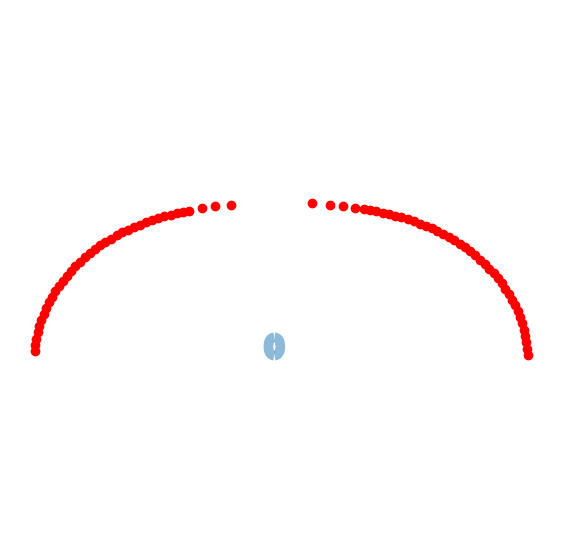

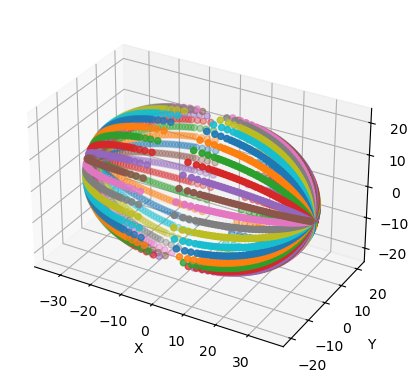

In [92]:
points_2d = shapes_analyt()
points_2d_shifted = centering(points_2d)
points_2d_shifted = points_2d_shifted - np.min(points_2d[:,0])
points_2d_reduced = correct_spacing(points_2d_shifted,10)
mean_dist = distance(points_2d_reduced)
factor = 1.12 / mean_dist
print("Scaling factor is: ",factor)
calculate_diameter(points_2d_reduced)
points_2d_reduced = scale(points_2d_reduced,factor)
distance(points_2d_reduced)
diameter = calculate_diameter(points_2d_reduced)
# points_2d_reduced = add_symmetry(points_2d_reduced)
print(f"Reducing atoms from {points_2d.shape[0]} to {points_2d_reduced.shape[0]}")
plt.plot(points_2d_reduced[:,0],points_2d_reduced[:,1],'ro')
plt.axis('equal')
plt.grid()


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

angle_degrees = np.arange(0,360,10)
# print(angle_degrees)

surface_points = []

N_points = points_2d_reduced.shape[0] * angle_degrees.shape[0]
print(N_points)
for i in angle_degrees:
    points_3d_rotated = rotate(points_2d_reduced,i)
    plot(points_3d_rotated,ax)
    surface_points.append(points_3d_rotated)


surface_points = np.asarray(surface_points)
surface_points = surface_points.reshape((-1,3))
print(surface_points.shape)
# plot(surface_points,ax)

ax.axes
# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Make the axes equal
ax.set_aspect('equal', adjustable='box')
# Show the plot


# coarse graining
instead of selecting the atoms I can simply exclude the one with too many neighbours

In [13]:
from sklearn.neighbors import BallTree

(0.0, 1.0)

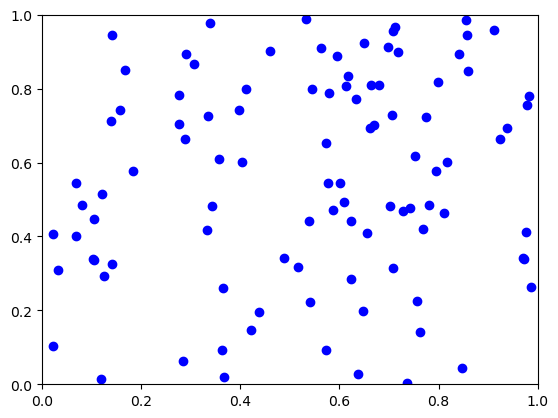

In [50]:
data = np.random.rand(100,2)
plt.plot(data[:,0],data[:,1],'bo')
plt.xlim(0,1)
plt.ylim(0,1)

In [51]:
tree = BallTree(data)
query_point=data[0,:]
indexes = tree.query_radius([query_point],0.1,return_distance = False)
indexes = indexes[0]
indexes

array([ 0, 50, 66, 68, 84, 91])

(0.0, 1.0)

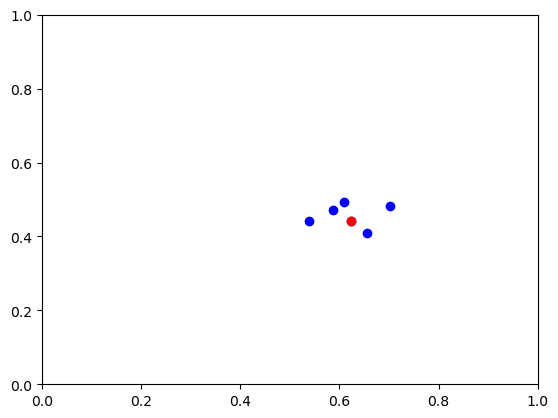

In [52]:
plt.plot(data[indexes][:,0],data[indexes][:,1],'bo')
plt.plot(query_point[0],query_point[1],'ro')
plt.xlim(0,1)
plt.ylim(0,1)

In [110]:
np.where([]).ise

array([], dtype=int64)

In [53]:
mean_point = np.mean(data[indexes],axis=0)

(0.0, 1.0)

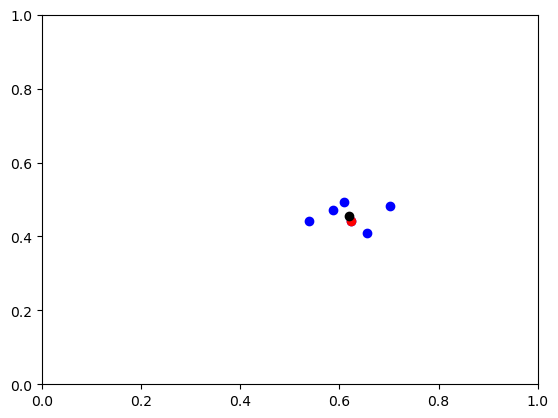

In [54]:
plt.plot(data[indexes][:,0],data[indexes][:,1],'bo')
plt.plot(query_point[0],query_point[1],'ro')
plt.plot(mean_point[0],mean_point[1],'ko')

plt.xlim(0,1)
plt.ylim(0,1)

(0.0, 1.0)

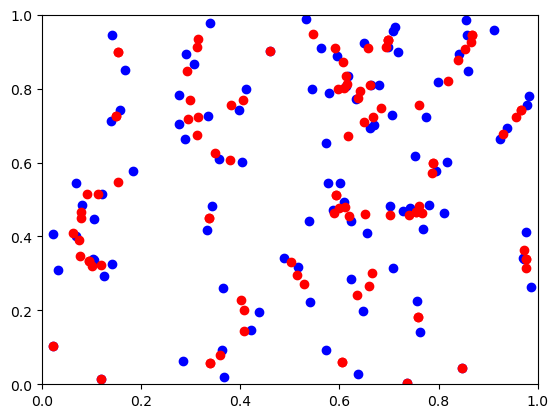

In [63]:
mean_point_list = []
mask = []

for i in range(data.shape[0]):
    query_point=data[i,:]
    indexes = tree.query_radius([query_point],0.1,return_distance = False)
    indexes = indexes[0]
    mean_point = np.mean(data[indexes],axis=0)
    mean_point_list.append(mean_point)
    mask.append(indexes)

coarse_data = np.array(mean_point_list)
coarse_data

plt.plot(data[:,0],data[:,1],'bo')
plt.plot(coarse_data[:,0],coarse_data[:,1],'ro')

plt.xlim(0,1)
plt.ylim(0,1)

In [106]:
mask = (data[:,0] > i) & (data[:,0] < i + dx) & (data[:,1] > j) & (data[:,1] < j + dy) 
indices = np.where(mask)
mask,indices

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 (array([28, 34, 45, 63, 73]),))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
25


(0.0, 1.0)

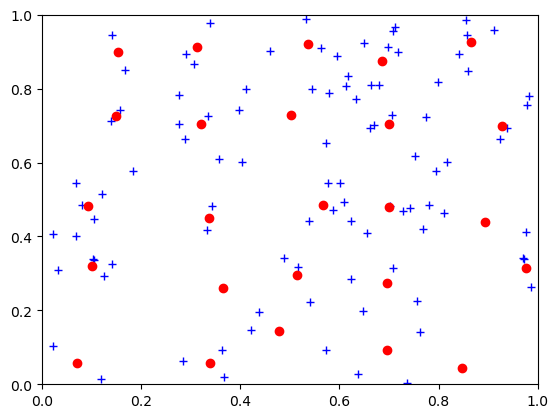

In [102]:
dx = dy = 0.2
mean_point_list = []

for i in np.arange(0,1,dx):
    for j in np.arange(0,1,dy):
        mask = (data[:,0] > i) & (data[:,0] < i + dx) & (data[:,1] > j) & (data[:,1] < j + dy) 
        indices = np.where(mask)
        mean_point = np.mean(data[indices],axis=0)
        mean_point_list.append(mean_point)
        print(len(indices))
coarse_data = np.array(mean_point_list)
print(coarse_data.shape[0])

plt.plot(data[:,0],data[:,1],'b+')
plt.plot(coarse_data[:,0],coarse_data[:,1],'ro')

plt.xlim(0,1)
plt.ylim(0,1)

# lammps datafile

In [ ]:
def write_positions(atom_positions,diameter):
    # Define LAMMPS atom data file content
    # atoms
    # atom-ID atom-type ellipsoidflag density x y z

    # ellipsoids
    # line syntax: atom-ID shapex shapey shapez quatw quati quatj quatk



    atomtype = 1
    ellipsoidflag = 1
    density = 1.0 / (4.0/3.0*np.pi)

    
    lammps_data = f"""\
    Diameter equal to {diameter:.6f}
    
    {len(atom_positions)} atoms
    {len(atom_positions)} ellipsoids

    1 atom types
    
    0.0 {atom_positions.max(0)[0]:.6f} xlo xhi
    0.0 {atom_positions.max(0)[1]:.6f} ylo yhi
    0.0 {atom_positions.max(0)[2]:.6f} zlo zhi
    
    
    Atoms
    
    """
    
    # Append atom positions to the LAMMPS data
    for i, position in enumerate(atom_positions):
        atom_id = i + 1  # LAMMPS atom IDs start from 1
        lammps_data += f"{atom_id} {atomtype} {ellipsoidflag} {density:.6f} {position[0]:.6f} {position[1]:.6f} {position[2]:.6f}\n"

    lammps_data += f"""
    Ellipsoids

    """
    for i, position in enumerate(atom_positions):
        atom_id = i + 1  # LAMMPS atom IDs start from 1
       # line syntax: atom-ID shapex shapey shapez quatw quati quatj quatk

        lammps_data += f"{atom_id} 1.0 0.99 0.99 0.0 0.0 0.0 0.0 \n"
    
    # Write the LAMMPS data to a file
    with open("atom_data.lammps", "w") as file:
        file.write(lammps_data)
    
    print("LAMMPS data file 'atom_data.lammps' has been generated.")

In [ ]:
surface_points = shift(surface_points)
write_positions(surface_points,diameter)

In [ ]:
# quaternion tests

In [49]:
import numpy as np
import quaternionic as q
from sklearn.neighbors import BallTree

def cartesian_to_spherical(x, y, z):
    """
    Convert Cartesian coordinates to spherical coordinates.

    :param x: X-coordinate.
    :param y: Y-coordinate.
    :param z: Z-coordinate.
    :return: A tuple (azimuth, elevation, radius) representing the spherical coordinates.
    """
    radius = np.sqrt(x**2 + y**2 + z**2)
    
    # Calculate azimuth angle (longitude)
    phi = np.arctan2(y, x)
    
    # Calculate elevation angle (latitude)
    theta = np.arccos(z / radius)
    
    return theta, phi, radius

In [81]:
theta,phi,radius = cartesian_to_spherical(0,1,0)
theta,phi,radius

(1.5707963267948966, 1.5707963267948966, 1.0)

In [82]:
180*theta/np.pi,180*phi/np.pi

(90.0, 90.0)

In [83]:
quaternion = q.array.from_spherical_coordinates([theta,phi])
quaternion # w,i,j,k

quaternionic.array([ 0.5, -0.5,  0.5,  0.5])

In [45]:
quaternion.w

array(0.65328148)

In [46]:
quaternion.to_euler_angles #alpha,beta,gamma # phi theta

array([0.78539816, 1.57079633, 0.        ])

quaternionic.array([ 0.32664074, -0.13529903,  0.32664074,  0.13529903])

In [48]:
atom_positions = np.load("lmp_coords.npy")
tree = BallTree(atom_positions)

atom_positions.shape

(1975, 3)

In [ ]:
for i, position in tqdm(enumerate(atom_positions)):
   # line syntax: atom-ID shapex shapey shapez quatw quati quatj quatk
    query_point=position
    indices = tree.query_radius([query_point],cutoff,return_distance=False)
    indices = indices[0]
    dist = 0.0
    for idx in indices:
        x = atom_positions[0]
        y = atom_positions[1]
        z = atom_positions[2]
        theta,phi,radius = cartesian_to_spherical(x, y, z)
        quaternion = q.array.from_spherical_coordinates([theta,phi])
    

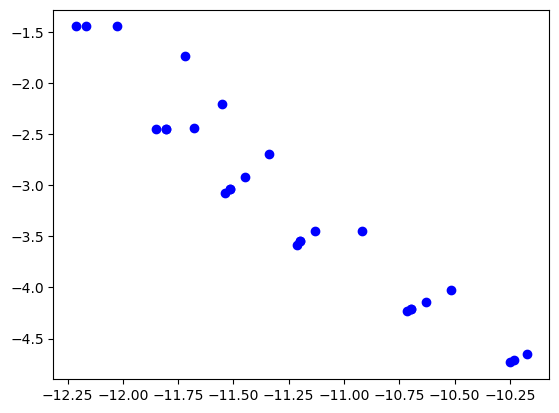

In [60]:
cutoff = 2.6
query_point=data[0,:]

tree = BallTree(data)
indices = tree.query_radius([query_point],cutoff,return_distance=False)
indices = indices[0]
plt.plot(data[indices,0],data[indices,1],'bo')

In [84]:
0.0402557785703732 - 0.0301918339277799

0.0100639446425933

In [ ]:
0.0301918339277799